In [ ]:
'''
Dataset Info.

train.csv [파일]
84406개의 데이터
ID : 샘플 별 고유 id
월 : 사건 발생월
요일 : 월요일 ~ 일요일
시간 : 사건 발생 시각
소관경찰서 : 사건 발생 구역의 담당 경찰서
소관지역 : 사건 발생 구역
사건발생거리 : 가장 가까운 경찰서에서 사건 현장까지의 거리
강수량(mm) 
강설량(mm)
적설량(cm) 
풍향 : 범죄발생지에서 바람이 부는 방향(최대 360도)
안개 : 가시거리가 1km 미만인 경우
짙은안개 : 가시거리가 200m 미만인 경우
번개
진눈깨비
서리
연기/연무 : 먼지, 연기가 하늘을 가리는 현상
눈날림
범죄발생지 : 범죄가 발생한 장소
TARGET : 범죄타입 [0 : 강도, 1: 절도, 2: 상해]
 절도 : 6년이하, 1천만원 이하
 강도 : 5년??
 상해 : 7년이하, 10년이하 영업정

test.csv [파일]
17289개의 데이터
ID : 샘플 별 고유 id
월 : 사건 발생월
요일 : 월요일 ~ 일요일
시간 : 사건 발생 시각
소관경찰서 : 사건 발생 구역의 담당 경찰서
소관지역 : 사건 발생 구역
사건발생거리 : 가장 가까운 경찰서에서 사건 현장까지의 거리
강수량(mm) 
강설량(mm)
적설량(cm) 
풍향 : 범죄발생지에서 바람이 부는 방향(최대 360도)
안개 : 가시거리가 1km 미만인 경우
짙은안개 : 가시거리가 200m 미만인 경우
번개
진눈깨비
서리
연기/연무 : 먼지, 연기가 하늘을 가리는 현상
눈날림
범죄발생지 : 범죄가 발생한 장소


sample_submission.csv [제출양식]
ID : 샘플 별 고유 id
TARGET : 범죄타입 [0 : 강도, 1: 절도, 2: 상해]
'''

In [240]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [211]:
y_train = train['TARGET']
x_train = train.drop(['ID', 'TARGET'], axis = 1)

x_test = test.drop('ID', axis = 1)

In [241]:
print(train.shape)
train.head(3)

(84406, 20)


,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.0,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       84406 non-null  object 
 1   월        84406 non-null  int64  
 2   요일       84406 non-null  object 
 3   시간       84406 non-null  int64  
 4   소관경찰서    84406 non-null  int64  
 5   소관지역     84406 non-null  float64
 6   사건발생거리   84406 non-null  float64
 7   강수량(mm)  84406 non-null  float64
 8   강설량(mm)  84406 non-null  float64
 9   적설량(cm)  84406 non-null  float64
 10  풍향       84406 non-null  float64
 11  안개       84406 non-null  float64
 12  짙은안개     84406 non-null  float64
 13  번개       84406 non-null  float64
 14  진눈깨비     84406 non-null  float64
 15  서리       84406 non-null  float64
 16  연기/연무    84406 non-null  float64
 17  눈날림      84406 non-null  float64
 18  범죄발생지    84406 non-null  object 
 19  TARGET   84406 non-null  int64  
dtypes: float64(13), int64(4), object(3)
memory usage: 

In [10]:
train.describe()

,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,TARGET
count,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000
mean,6.430195,6.769507,1060.027581,26.881726,1.912424,24.608776,2.284407,23.430503,186.926107,0.385423,0.017842,0.144042,0.020330,0.010260,0.210755,0.008921,0.835355
std,3.108302,3.566390,698.380485,13.870968,0.958556,62.711211,15.852881,85.199896,98.299485,0.486698,0.132379,0.351134,0.141128,0.100771,0.407847,0.094030,0.819762
min,1.000000,1.000000,26.000000,5.000000,0.012269,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,526.000000,13.000000,1.209985,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,7.000000,937.000000,27.000000,1.822279,0.625000,0.000000,0.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.000000,10.000000,1638.000000,38.000000,2.476528,18.571429,0.000000,0.000000,260.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,12.000000,12.000000,2450.000000,54.000000,4.998936,614.875000,295.000000,649.800000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [11]:
train.isnull().sum()

ID         0
월          0
요일         0
시간         0
소관경찰서      0
소관지역       0
사건발생거리     0
강수량(mm)    0
강설량(mm)    0
적설량(cm)    0
풍향         0
안개         0
짙은안개       0
번개         0
진눈깨비       0
서리         0
연기/연무      0
눈날림        0
범죄발생지      0
TARGET     0
dtype: int64

In [12]:
corr_train = train.corr().apply(lambda x: round(x ,2))
corr_train

C:\Users\이도형\AppData\Local\Temp\ipykernel_17196\2513620239.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_train = train.corr().apply(lambda x: round(x ,2))


,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,TARGET
월,1.00,0.00,0.02,0.02,0.00,0.07,-0.22,-0.40,-0.05,-0.10,-0.18,0.17,-0.16,-0.15,-0.03,-0.14,-0.01
시간,0.00,1.00,-0.01,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.01,-0.00,-0.01,-0.00,0.02
소관경찰서,0.02,-0.01,1.00,0.68,-0.12,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.01,-0.00,0.00
소관지역,0.02,-0.00,0.68,1.00,-0.10,0.00,-0.00,-0.01,-0.00,-0.01,-0.00,0.00,-0.00,-0.01,0.00,-0.01,-0.00
사건발생거리,0.00,0.00,-0.12,-0.10,1.00,0.01,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00
강수량(mm),0.07,0.00,-0.00,0.00,0.01,1.00,0.14,-0.01,-0.03,0.32,-0.03,0.36,-0.03,-0.01,-0.02,0.08,-0.01
강설량(mm),-0.22,-0.00,0.00,-0.00,0.00,0.14,1.00,0.50,0.07,0.14,0.03,-0.06,0.02,0.04,0.06,0.52,-0.02
적설량(cm),-0.40,-0.00,-0.00,-0.01,0.00,-0.01,0.50,1.00,0.17,0.15,0.09,-0.11,0.18,0.01,0.14,0.32,-0.01
풍향,-0.05,0.00,-0.00,-0.00,-0.00,-0.03,0.07,0.17,1.00,0.01,0.04,0.04,-0.06,-0.09,0.00,0.06,-0.01
안개,-0.10,-0.00,-0.00,-0.01,-0.00,0.32,0.14,0.15,0.01,1.00,0.17,0.35,0.11,0.13,0.41,0.12,-0.01


In [13]:
s = corr_train.unstack()
df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df.style.background_gradient(cmap='viridis')

,,corr
소관경찰서,소관지역,0.680000
소관지역,소관경찰서,0.680000
서리,진눈깨비,0.570000
진눈깨비,서리,0.570000
강설량(mm),눈날림,0.520000
눈날림,강설량(mm),0.520000
강설량(mm),적설량(cm),0.500000
적설량(cm),강설량(mm),0.500000
안개,연기/연무,0.410000
연기/연무,안개,0.410000


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

요일
금요일    12243
목요일    11331
수요일    11410
월요일    11702
일요일    12837
토요일    13317
화요일    11566
dtype: int64


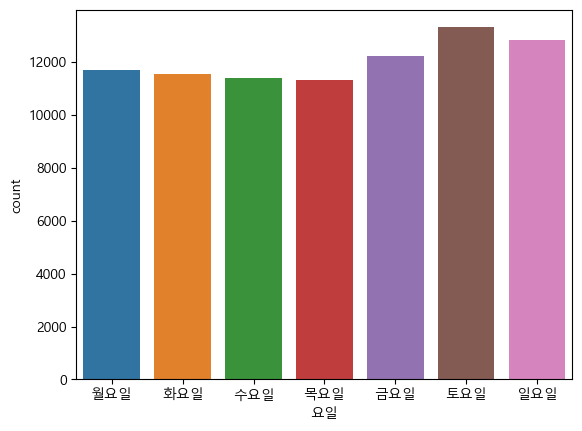

In [21]:
plt.rc("font", family="Malgun Gothic")
sns.countplot(x='요일',data=train,order = ('월요일','화요일','수요일','목요일','금요일','토요일','일요일'))
print(train.groupby('요일').size())

시간
1     7093
2     6800
3     6681
4     6291
5     6152
6     6119
7     6452
8     7130
9     7374
10    7451
11    7423
12    9440
dtype: int64


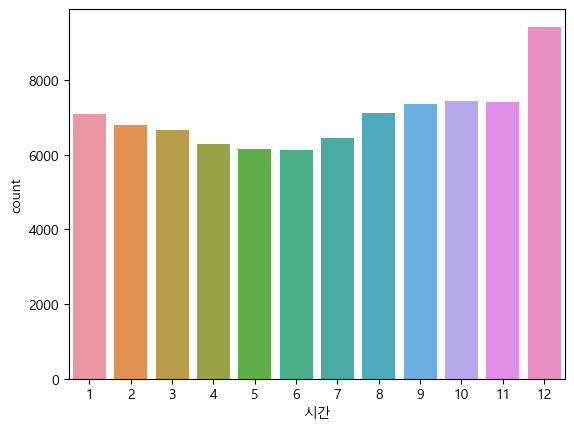

In [22]:
sns.countplot(x='시간',data = train)
print(train.groupby('시간').size())

TARGET
0    36453
1    25397
2    22556
dtype: int64


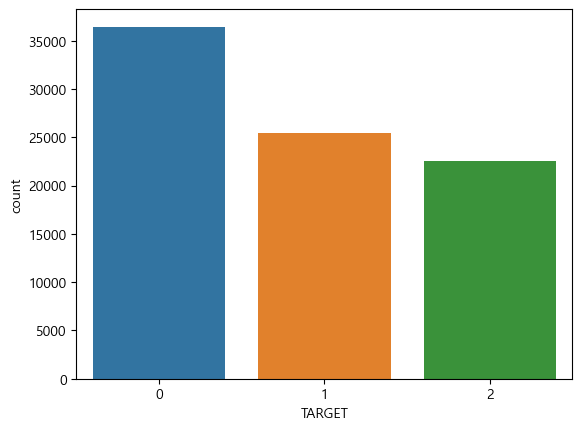

In [26]:
sns.countplot(x='TARGET',data = train)
print(train.groupby('TARGET').size())

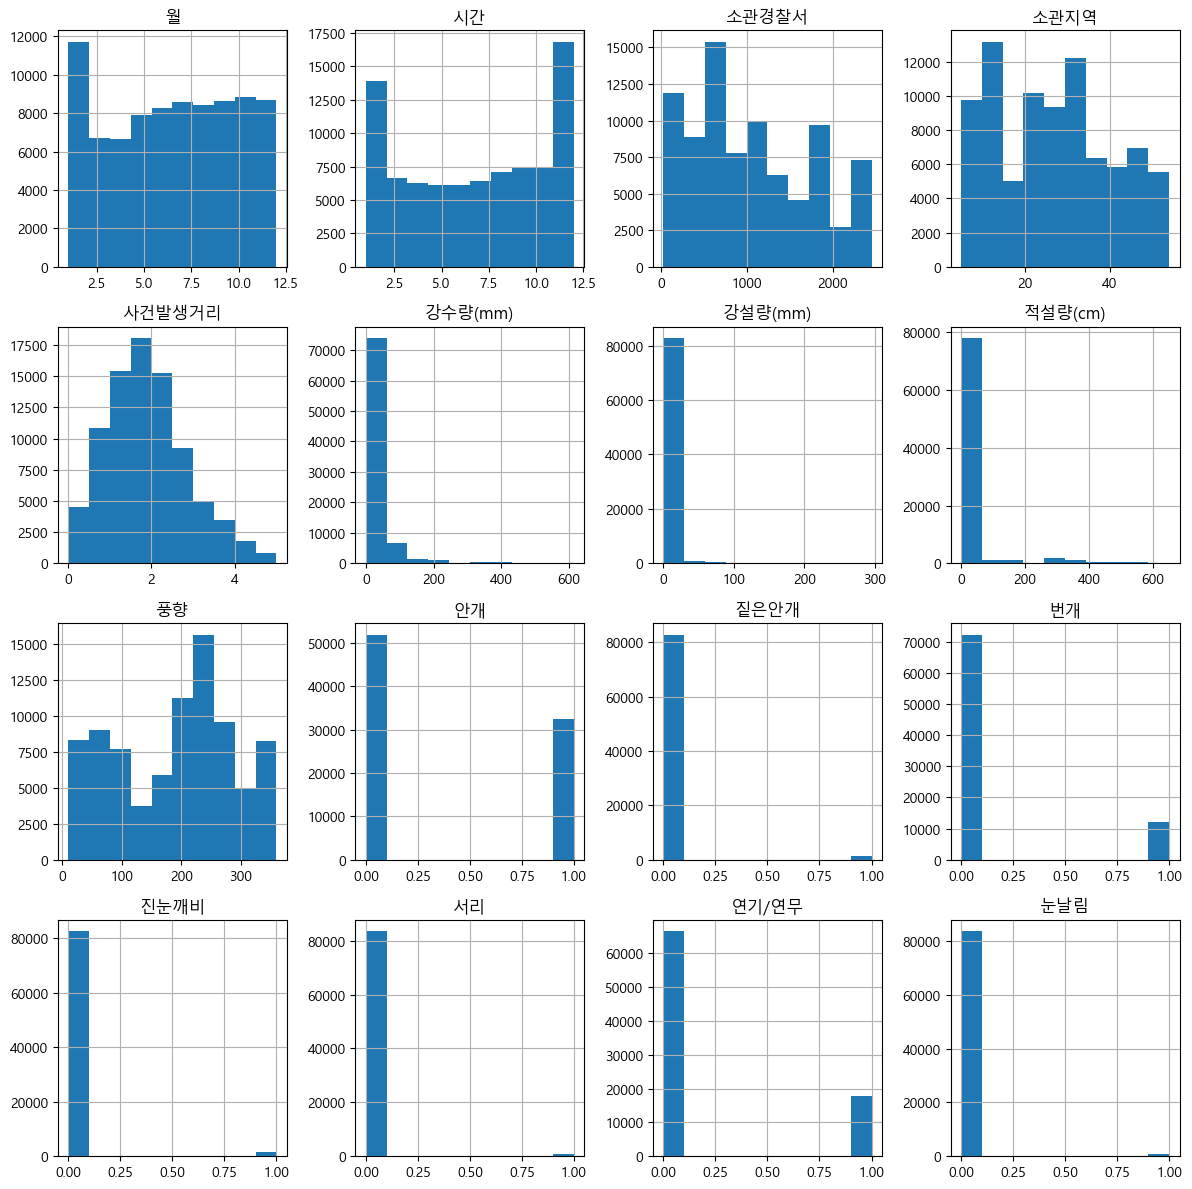

In [23]:
import warnings
warnings.filterwarnings('ignore')

except_target = train.drop('TARGET', axis = 1)
except_target.hist(figsize = (12,12))
plt.tight_layout()
plt.show()

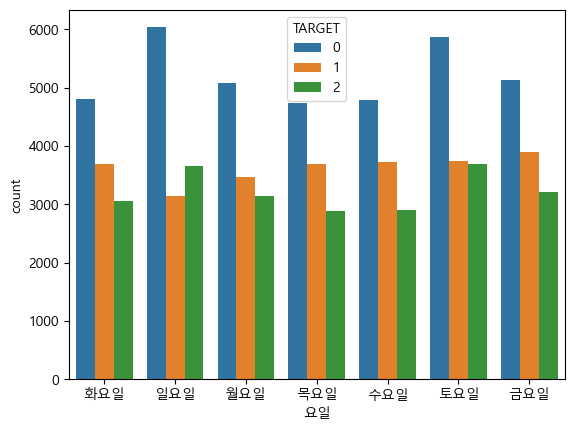

In [27]:
sns.countplot(x = '요일', hue = 'TARGET', data = train)
plt.show()

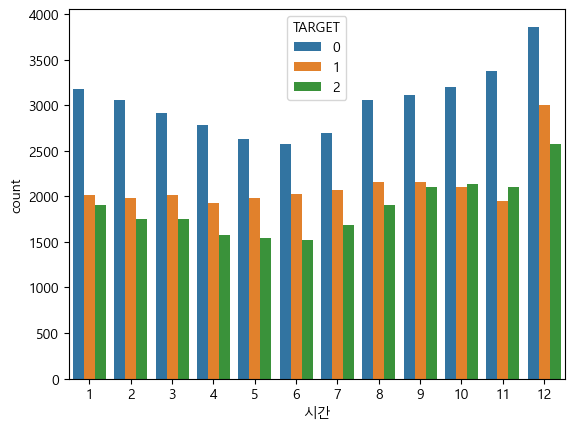

In [24]:
sns.countplot(x = '시간', hue = 'TARGET', data = train)
plt.show()

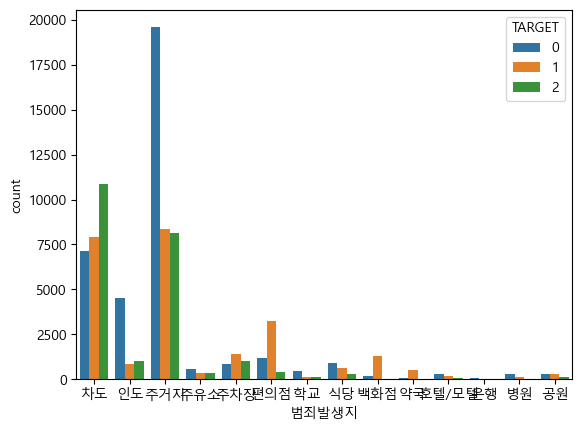

In [141]:
sns.countplot(x = '범죄발생지', hue = 'TARGET', data = train)
plt.show()

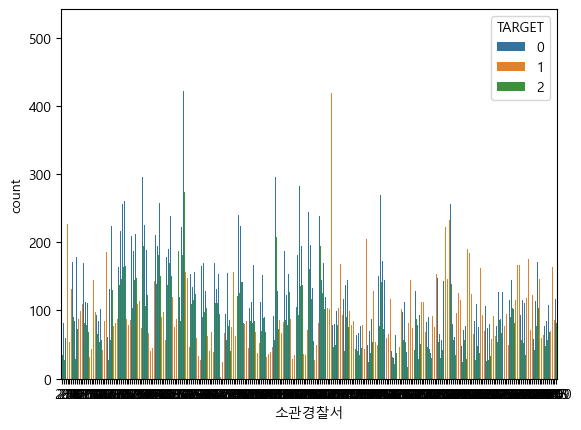

In [142]:
sns.countplot(x = '소관경찰서', hue = 'TARGET', data = train)
plt.show()

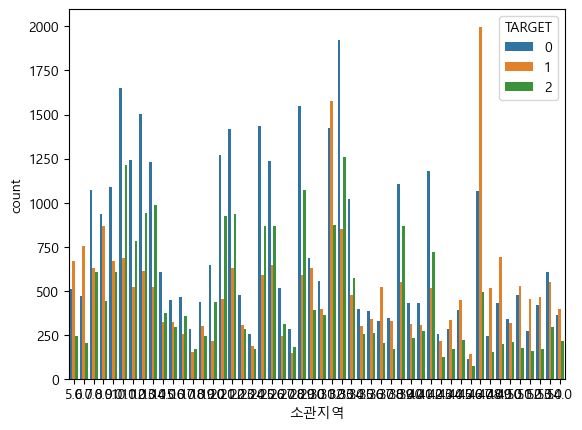

In [143]:
sns.countplot(x = '소관지역', hue = 'TARGET', data = train)
plt.show()

In [242]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
import numpy as np

In [243]:
ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(x_train[feature])
    x_train[feature] = le.transform(x_train[feature])

    for label in np.unique(x_test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    x_test[feature] = le.transform(x_test[feature])

In [36]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, f1_score

In [46]:
xgb_model = XGBClassifier(n_estimators= 300,learning_rate= 0.1,max_depth= 5,eval_metric= 'merror')
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [48]:
pred = xgb_model.predict(x_train)
score = f1_score(pred,y_train,average='macro')
score

0.5527211399822115

In [50]:
pred2 = xgb_model.predict(x_test)

In [51]:
sub['TARGET'] = pred2
sub.head()

,ID,TARGET
0,TEST_00000,2
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [52]:
sub.to_csv('sub_xgb_grid2.csv', index = False)

In [54]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

In [76]:
importance = xgb_model.feature_importances_
feature_names = list(x_train.columns)

In [82]:
sorted_idx = importance.argsort()[::-1]

범죄발생지: 0.3990326225757599
소관지역: 0.08990478515625
소관경찰서: 0.08525654673576355
요일: 0.03842945024371147
월: 0.033544719219207764
진눈깨비: 0.03204750642180443
사건발생거리: 0.031272128224372864
시간: 0.029992349445819855
적설량(cm): 0.0296330563724041
짙은안개: 0.028819508850574493
강설량(mm): 0.02827909216284752
강수량(mm): 0.027492957189679146
서리: 0.02688552439212799
눈날림: 0.026047205552458763
풍향: 0.02547898143529892
연기/연무: 0.023980073630809784
번개: 0.022935982793569565
안개: 0.02096755988895893


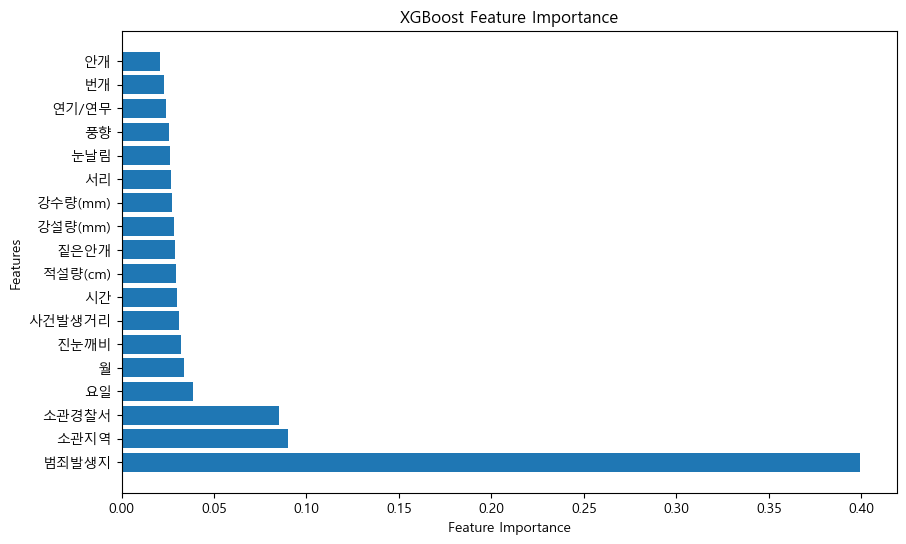

In [83]:
for i in sorted_idx:
    print(f"{feature_names[i]}: {importance[i]}")

# Plot feature importance in descending order
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance[sorted_idx], align='center')
plt.yticks(range(len(importance)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

In [88]:
importance = xgb_model.get_booster().get_score(importance_type='gain')
feature_names = list(x_train.columns)

범죄발생지: 30.677879333496094
소관지역: 6.9119367599487305
소관경찰서: 6.554576873779297
요일: 2.9544804096221924
월: 2.578939199447632
진눈깨비: 2.4638326168060303
사건발생거리: 2.4042208194732666
시간: 2.305830717086792
적설량(cm): 2.278208017349243
짙은안개: 2.2156620025634766
강설량(mm): 2.174114465713501
강수량(mm): 2.113675832748413
서리: 2.0669760704040527
눈날림: 2.002525568008423
풍향: 1.9588401317596436
연기/연무: 1.8436031341552734
번개: 1.7633328437805176
안개: 1.611999273300171


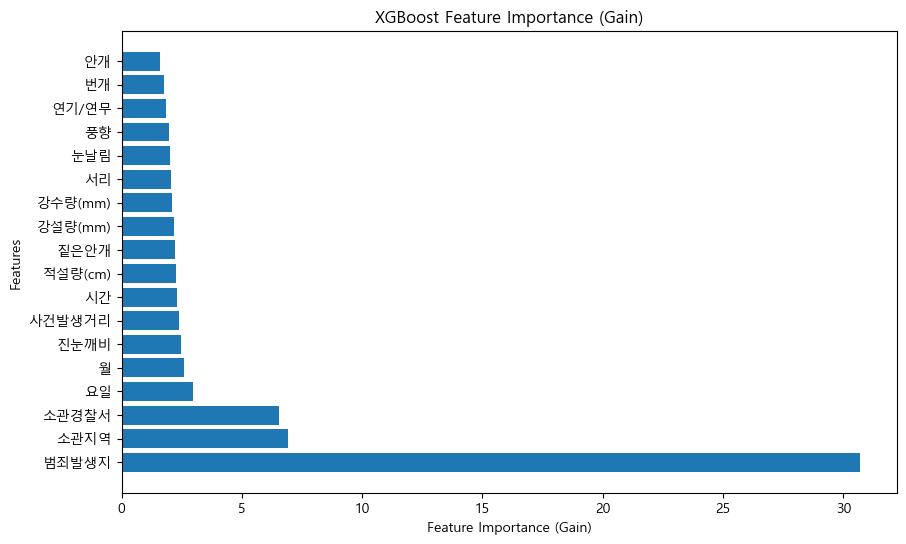

In [90]:
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
for feature, importance_value in sorted_importance:
    print(f"{feature}: {importance_value}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance)), [val[1] for val in sorted_importance], align='center')
plt.yticks(range(len(sorted_importance)), [val[0] for val in sorted_importance])
plt.xlabel('Feature Importance (Gain)')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance (Gain)')
plt.show()

In [91]:
import shap

In [92]:
explainer = shap.Explainer(xgb_model)

In [101]:
shap_values = explainer.shap_values(x_test)

In [128]:
print(shap_values[0])

[[ 5.1590335e-03 -3.7452135e-02  4.6116412e-02 ...  2.0258522e-03
  -1.0846349e-05 -4.1382408e-01]
 [-9.5167402e-03 -4.3144383e-02  6.0153361e-03 ...  4.1545862e-03
  -3.3426561e-05  2.0978938e-01]
 [ 2.0345054e-03 -3.3456899e-02  1.7594498e-02 ... -2.1670618e-04
  -1.4468761e-05  3.0304724e-01]
 ...
 [ 2.7692530e-03 -1.0661577e-02 -3.4107987e-02 ...  1.9204229e-03
  -8.3023724e-06  2.8923312e-01]
 [ 3.5073706e-03 -3.5343267e-02  9.9035036e-03 ...  1.8394031e-03
  -7.8420380e-06  2.2203891e-01]
 [-2.8760808e-03 -7.8079186e-02 -1.6555425e-02 ... -1.9744698e-02
  -1.0846349e-05 -1.1215580e+00]]


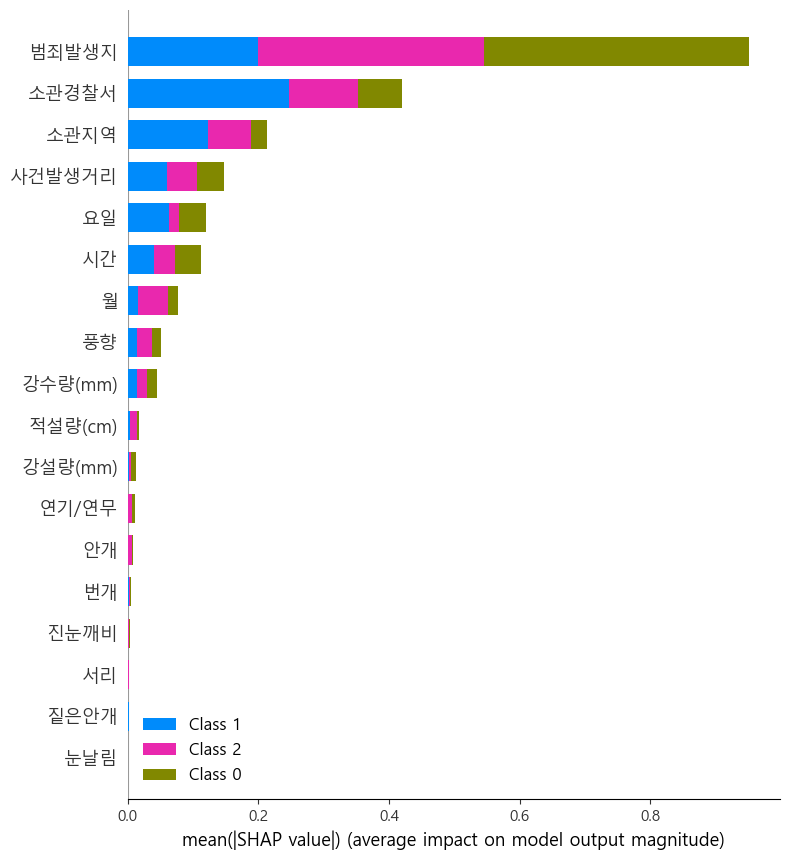

In [97]:
shap.summary_plot(shap_values, x_test, plot_type='bar')

In [112]:
shap.initjs()
instance_index = 0
shap.force_plot(explainer.expected_value[0], shap_values[0][instance_index], x_test.iloc[instance_index])

In [122]:
shap.initjs()
instance_index = 0
shap.force_plot(explainer.expected_value[1], shap_values[0][instance_index], x_test.iloc[instance_index])

In [121]:
shap.initjs()
instance_index = 0
shap.force_plot(explainer.expected_value[2], shap_values[0][instance_index], x_test.iloc[instance_index])

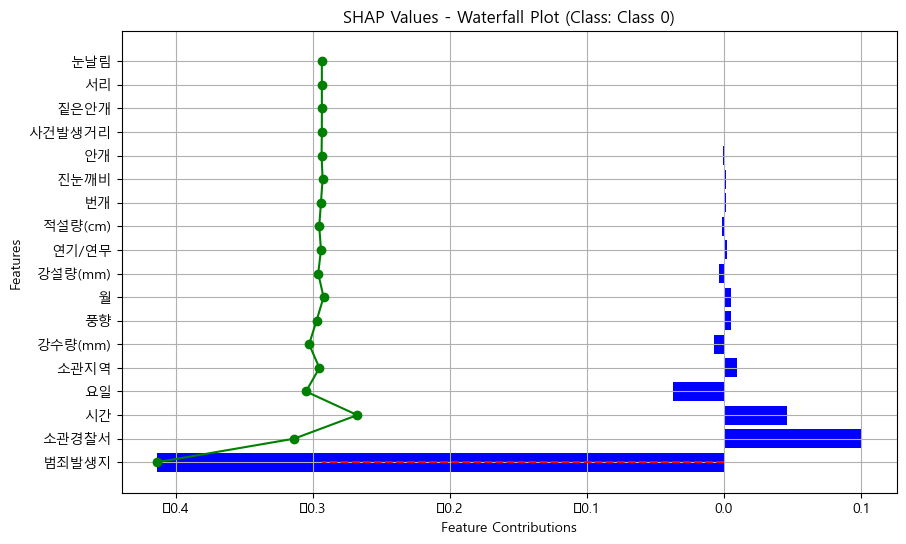

In [139]:
class_labels = ["Class 0", "Class 1", "Class 2"]

# Select a specific instance for the waterfall plot
instance_index = 0
class_index = 0  # Choose the class for which you want to visualize the waterfall plot

# Get the SHAP values for the selected instance and class
shap_values_instance = shap_values[class_index][instance_index]

# Sort the feature contributions in descending order
sorted_indices = np.argsort(np.abs(shap_values_instance))[::-1]
sorted_contributions = shap_values_instance[sorted_indices]
sorted_features = x_test.columns[sorted_indices]

# Calculate the cumulative contributions
cumulative_contributions = np.cumsum(sorted_contributions)

# Plot the waterfall chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_contributions, color='b')
plt.plot([0, cumulative_contributions[-1]], [0, 0], 'r--', linewidth=1.5)
plt.plot(cumulative_contributions, sorted_features, 'go-', linewidth=1.5, markersize=6)
plt.xlabel("Feature Contributions")
plt.ylabel("Features")
plt.title("SHAP Values - Waterfall Plot (Class: {})".format(class_labels[class_index]))
plt.grid(True)
plt.show()

In [ ]:
#XGBoost hyperopt

In [318]:
X, Y = train.drop(['ID', 'TARGET'], axis=1), train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)
#test = test.drop('ID', axis = 1)

In [321]:
from hyperopt import hp

xgb_search_space = {
    'max_depth':hp.quniform('max_depth', 5, 20, 1),                     ## 정수형 하이퍼 파라미터 => quniform 사용
    'min_child_weight':hp.quniform('min_child_weight', 1, 2, 1),        ## 정수형 하이퍼 파라미터 => quniform 사용
    'learning_rate':hp.uniform('learning_rate', 0.01, 0.2),
    'colsample_bytree':hp.uniform('colsample_bytree', 0.5, 1),
}

In [322]:
## 2. 목적 함수 설정
## 검색 공간에서 설정한 하이퍼 파라미터들을 입력 받아서 XGBoost를 학습시키고, 평가 지표를 반환하도록 구성되어야 함

from sklearn.model_selection import cross_val_score  ## 교차 검증
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

scorer = make_scorer(f1_score, average='macro')

def objective_func(search_space):
    xgb_clf = XGBClassifier(
        n_estimators=100,
        max_depth=int(search_space['max_depth']),
        min_child_weight=int(search_space['min_child_weight']),
        learning_rate=search_space['learning_rate'], 
        colsample_bytree=search_space['colsample_bytree'],
        eval_metric='logloss'
    )

    scorer = make_scorer(f1_score, average='macro')
    f1_scores = cross_val_score(xgb_clf, X_train, y_train, scoring=scorer, cv=3)

    return {
        'loss': -1 * np.mean(f1_scores),
        'status': STATUS_OK
    }


In [323]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials() ## 결과 저장

best = fmin(
    fn=objective_func,
    space=xgb_search_space,
    algo=tpe.suggest,
    max_evals=50,    ## 최대 반복 횟수 지정
    trials=trial_val,
)

100%|███████████████████████████████████████████████| 50/50 [44:05<00:00, 52.91s/trial, best loss: -0.5195852103088323]


In [324]:
xgb_wrapper = XGBClassifier(
    n_estimators=400,
    learning_rate=round(best['learning_rate'], 5),
    max_depth=int(best['max_depth']),
    min_child_weight=int(best['min_child_weight']),
    colsample_bytree=round(best['colsample_bytree'], 5)
)

In [329]:
## early stopping

evals = [(X_train, y_train), (X_test, y_test)]

## model train

xgb_wrapper.fit(
    X_train, y_train,
    early_stopping_rounds=50,
    eval_metric='merror',
    eval_set=evals,
    verbose=True
)

[0]	validation_0-merror:0.51026	validation_1-merror:0.51718
[1]	validation_0-merror:0.45873	validation_1-merror:0.46635
[2]	validation_0-merror:0.45285	validation_1-merror:0.46067
[3]	validation_0-merror:0.45388	validation_1-merror:0.46351
[4]	validation_0-merror:0.46668	validation_1-merror:0.47856
[5]	validation_0-merror:0.46000	validation_1-merror:0.47216
[6]	validation_0-merror:0.45421	validation_1-merror:0.46327
[7]	validation_0-merror:0.45194	validation_1-merror:0.46096
[8]	validation_0-merror:0.44676	validation_1-merror:0.45575
[9]	validation_0-merror:0.44740	validation_1-merror:0.45688
[10]	validation_0-merror:0.45097	validation_1-merror:0.46363
[11]	validation_0-merror:0.45243	validation_1-merror:0.46576
[12]	validation_0-merror:0.45159	validation_1-merror:0.46499
[13]	validation_0-merror:0.45462	validation_1-merror:0.46849
[14]	validation_0-merror:0.45237	validation_1-merror:0.46564
[15]	validation_0-merror:0.45489	validation_1-merror:0.46861
[16]	validation_0-merror:0.44839	v

[134]	validation_0-merror:0.41901	validation_1-merror:0.44385
[135]	validation_0-merror:0.41905	validation_1-merror:0.44414
[136]	validation_0-merror:0.41904	validation_1-merror:0.44408
[137]	validation_0-merror:0.41862	validation_1-merror:0.44408
[138]	validation_0-merror:0.41852	validation_1-merror:0.44367
[139]	validation_0-merror:0.41834	validation_1-merror:0.44373
[140]	validation_0-merror:0.41824	validation_1-merror:0.44379
[141]	validation_0-merror:0.41812	validation_1-merror:0.44402
[142]	validation_0-merror:0.41803	validation_1-merror:0.44402
[143]	validation_0-merror:0.41801	validation_1-merror:0.44385
[144]	validation_0-merror:0.41778	validation_1-merror:0.44361
[145]	validation_0-merror:0.41761	validation_1-merror:0.44349
[146]	validation_0-merror:0.41742	validation_1-merror:0.44379
[147]	validation_0-merror:0.41736	validation_1-merror:0.44390


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.61544, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05853, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [330]:
## eval
preds = xgb_wrapper.predict(X_test)

In [331]:
score = f1_score(preds,y_test,average='macro')
score

0.5272477626133879

In [332]:
p = xgb_wrapper.predict(X_train)

In [333]:
score = f1_score(p,y_train,average='macro')
score

0.5463831741293125

In [334]:
best

{'colsample_bytree': 0.6154395701566401,
 'learning_rate': 0.05852879065946083,
 'max_depth': 7.0,
 'min_child_weight': 2.0}

In [335]:
xgb_wrapper

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.61544, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05853, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [336]:
xgb_model_fix = XGBClassifier(n_estimators= 300,colsample_bytree= 0.6154,learning_rate= 0.0585,max_depth= 7,
                              min_child_weight= 2.0,eval_metric= 'merror')

In [337]:
xgb_model_fix.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6154, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.0585, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=2.0, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [338]:
p = xgb_model_fix.predict(X_test)

In [339]:
score = f1_score(p,y_test,average='macro')
score

0.5260952345068667

In [340]:
p = xgb_model_fix.predict(X_train)
score = f1_score(p,y_train,average='macro')
score

0.5770431459183277

In [341]:
pred = xgb_model_fix.predict(test)

In [344]:
sub['TARGET'] = pred
sub.head()

,ID,TARGET
0,TEST_00000,2
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [346]:
sub.to_csv('sub_xgb_hyperopt.csv', index = False)

TARGET
0    9739
1    3857
2    3693
dtype: int64


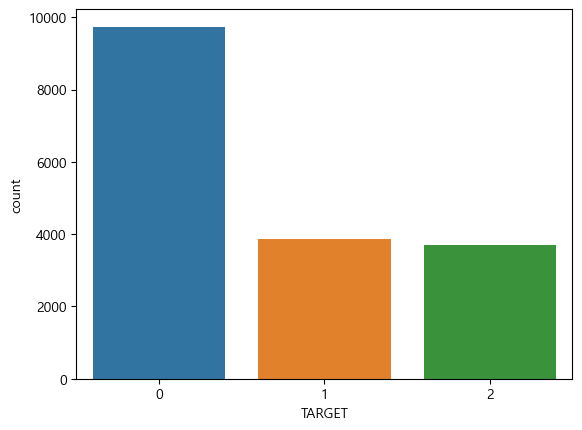

In [345]:
sns.countplot(x='TARGET',data = sub)
print(sub.groupby('TARGET').size())

In [156]:
from catboost import CatBoostClassifier

In [161]:
cat_model = CatBoostClassifier(iterations = 300,learning_rate=0.1,
                                    depth=4,loss_function='MultiClass')

In [162]:
cat_model.fit(x_train,y_train)

0:	learn: 1.0797416	total: 189ms	remaining: 56.5s
1:	learn: 1.0648604	total: 204ms	remaining: 30.4s
2:	learn: 1.0527435	total: 219ms	remaining: 21.7s
3:	learn: 1.0426008	total: 234ms	remaining: 17.3s
4:	learn: 1.0348996	total: 251ms	remaining: 14.8s
5:	learn: 1.0279527	total: 266ms	remaining: 13s
6:	learn: 1.0224254	total: 282ms	remaining: 11.8s
7:	learn: 1.0178463	total: 296ms	remaining: 10.8s
8:	learn: 1.0139432	total: 312ms	remaining: 10.1s
9:	learn: 1.0101906	total: 325ms	remaining: 9.43s
10:	learn: 1.0070693	total: 340ms	remaining: 8.94s
11:	learn: 1.0047577	total: 358ms	remaining: 8.59s
12:	learn: 1.0023976	total: 372ms	remaining: 8.22s
13:	learn: 1.0001671	total: 389ms	remaining: 7.94s
14:	learn: 0.9981575	total: 405ms	remaining: 7.7s
15:	learn: 0.9967094	total: 423ms	remaining: 7.51s
16:	learn: 0.9950122	total: 438ms	remaining: 7.3s
17:	learn: 0.9937678	total: 455ms	remaining: 7.12s
18:	learn: 0.9927958	total: 469ms	remaining: 6.94s
19:	learn: 0.9913019	total: 483ms	remaining: 

164:	learn: 0.9617041	total: 2.75s	remaining: 2.25s
165:	learn: 0.9616355	total: 2.77s	remaining: 2.23s
166:	learn: 0.9615739	total: 2.78s	remaining: 2.22s
167:	learn: 0.9614700	total: 2.8s	remaining: 2.2s
168:	learn: 0.9614435	total: 2.81s	remaining: 2.18s
169:	learn: 0.9613187	total: 2.83s	remaining: 2.16s
170:	learn: 0.9612586	total: 2.84s	remaining: 2.15s
171:	learn: 0.9612148	total: 2.86s	remaining: 2.13s
172:	learn: 0.9611644	total: 2.88s	remaining: 2.11s
173:	learn: 0.9611054	total: 2.89s	remaining: 2.09s
174:	learn: 0.9610401	total: 2.91s	remaining: 2.08s
175:	learn: 0.9609651	total: 2.92s	remaining: 2.06s
176:	learn: 0.9609040	total: 2.94s	remaining: 2.04s
177:	learn: 0.9608726	total: 2.96s	remaining: 2.03s
178:	learn: 0.9608169	total: 2.98s	remaining: 2.01s
179:	learn: 0.9607679	total: 2.99s	remaining: 2s
180:	learn: 0.9607110	total: 3.01s	remaining: 1.98s
181:	learn: 0.9606536	total: 3.02s	remaining: 1.96s
182:	learn: 0.9606171	total: 3.04s	remaining: 1.94s
183:	learn: 0.960

In [163]:
pred_cat = cat_model.predict(x_train)

In [164]:
pred = cat_model.predict(x_train)
score = f1_score(pred,y_train,average='macro')
score

0.5238333916951298

In [ ]:
#catboost 에서 train dataset을 훈련 / 검증으로 나눠봄

In [259]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [260]:
ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(train[feature])
    train[feature] = le.transform(train[feature])

    for label in np.unique(test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test[feature] = le.transform(test[feature])

In [261]:
train.head()

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,6,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,2
1,TRAIN_00001,11,6,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0
2,TRAIN_00002,8,4,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6,1
3,TRAIN_00003,5,3,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7,1
4,TRAIN_00004,9,4,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,2


In [262]:
x_train.head()

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,9,6,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
1,11,6,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
2,8,4,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
3,5,3,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7
4,9,4,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [288]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import catboost as ctb
from hyperopt import hp, fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
from sklearn.metrics import f1_score
import sklearn

X, Y = train.drop(['ID', 'TARGET'], axis=1), train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)


In [305]:
test = test.drop('ID', axis = 1)

In [289]:
# Define parameter range
learning_rate = np.linspace(0.01, 0.1, 10)
max_depth = np.arange(2, 18, 2)
colsample_bylevel = np.arange(0.3, 0.8, 0.1)
iterations = np.arange(50, 1000, 50)
l2_leaf_reg = np.arange(0, 10)
bagging_temperature = np.arange(0, 100, 10)

In [290]:
# Define the categorical features if any in the dataset for CatBoost to handle
categorical_features_indices = np.where(X_train.dtypes == np.object)[0]

# Define parameter space, fit conditions
ctb_clf_params = {
    'learning_rate': hp.choice('learning_rate', learning_rate),
    'max_depth': hp.choice('max_depth', max_depth),
    'iterations': hp.choice('iterations', iterations),
    'loss_function': 'MultiClass',
}
ctb_fit_params = {
    'early_stopping_rounds': 5,
    'verbose': False,
    'cat_features': categorical_features_indices
}
ctb_para = {
    'reg_params': ctb_clf_params,
    'fit_params': ctb_fit_params
}

In [291]:
# Define Hyperopt class
class HYPOpt(object):
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            print('entering fmin')
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)  # ----1
        except Exception as e:
            return {'status': STATUS_FAIL, 'exception': str(e)}
        return result

    def ctb_clf(self, para):  # ---- 2
        clf = ctb.CatBoostClassifier(**para['reg_params'])
        print('ctb initialized')
        return self.train_clf(clf, para)

    def train_clf(self, clf, para):  # ----- 3
        print('fitting model')
        clf.fit(self.x_train, self.y_train, eval_set=[(self.x_train, self.y_train), (self.x_test, self.y_test)],
                **para['fit_params'])
        print('model fitted')
        pred = clf.predict(self.x_test)
        f1 = sklearn.metrics.f1_score(self.y_test, pred, average='macro')
        f1 = f1 * (-1)  # ---- 4
        print(f1)
        return {'loss': f1, 'status': STATUS_OK}

In [292]:
# Define objective and find the best hyperparameters
obj = HYPOpt(X_train, X_test, y_train, y_test)
ctb_opt = obj.process(fn_name='ctb_clf', space=ctb_para, trials=Trials(), algo=tpe.suggest, max_evals=5)

entering fmin
ctb initialized                                                                                                        
fitting model                                                                                                          
model fitted                                                                                                           
-0.5115324299267994                                                                                                    
ctb initialized                                                                                                        
fitting model                                                                                                          
model fitted                                                                                                           
-0.5142535804971188                                                                                                    
ctb initialized           

In [293]:
ctb_opt

{'iterations': 9, 'learning_rate': 7, 'max_depth': 2}

In [294]:
#Save best parametrs in a dictionary
best_param={}
best_param['learning_rate']=learning_rate[ctb_opt['learning_rate']]
best_param['iterations']=iterations[ctb_opt['iterations']]
best_param['max_depth']=max_depth[ctb_opt['max_depth']]

In [295]:
best_param

{'learning_rate': 0.08, 'iterations': 500, 'max_depth': 6}

In [296]:
#build model with the best hyperparameters
model=ctb.CatBoostClassifier(iterations=best_param['iterations'], 
                             depth=best_param['max_depth'],
                             learning_rate=best_param['learning_rate'],
                            loss_function='MultiClass',
                            random_seed=42
                            )
model.fit(X_train,y_train,cat_features=categorical_features_indices, eval_set=None, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0826648	total: 29ms	remaining: 14.5s
1:	learn: 1.0693532	total: 50.3ms	remaining: 12.5s
2:	learn: 1.0575030	total: 71.5ms	remaining: 11.8s
3:	learn: 1.0477320	total: 89.1ms	remaining: 11s
4:	learn: 1.0394322	total: 105ms	remaining: 10.4s
5:	learn: 1.0323791	total: 124ms	remaining: 10.2s
6:	learn: 1.0263308	total: 143ms	remaining: 10.1s
7:	learn: 1.0212703	total: 160ms	remaining: 9.87s
8:	learn: 1.0167555	total: 179ms	remaining: 9.76s
9:	learn: 1.0130796	total: 197ms	remaining: 9.65s
10:	learn: 1.0094929	total: 215ms	remaining: 9.57s
11:	learn: 1.0065157	total: 235ms	remaining: 9.54s
12:	learn: 1.0038410	total: 253ms	remaining: 9.46s
13:	learn: 1.0013037	total: 270ms	remaining: 9.36s
14:	learn: 0.9993205	total: 286ms	remaining: 9.25s
15:	learn: 0.9976906	total: 304ms	remaining: 9.18s
16:	learn: 0.9960337	total: 322ms	remaining: 9.16s
17:	learn: 0.9947006	total: 340ms	remaining: 9.1s
18:	learn: 0.9930691	total: 357ms	remaining: 9.04s
19:	learn: 0.9917152	total: 375ms	remainin

172:	learn: 0.9549605	total: 3.2s	remaining: 6.05s
173:	learn: 0.9548655	total: 3.22s	remaining: 6.04s
174:	learn: 0.9547577	total: 3.24s	remaining: 6.02s
175:	learn: 0.9546452	total: 3.26s	remaining: 6.01s
176:	learn: 0.9545009	total: 3.29s	remaining: 6s
177:	learn: 0.9543892	total: 3.31s	remaining: 5.99s
178:	learn: 0.9542278	total: 3.33s	remaining: 5.98s
179:	learn: 0.9540839	total: 3.35s	remaining: 5.96s
180:	learn: 0.9540174	total: 3.37s	remaining: 5.94s
181:	learn: 0.9538727	total: 3.39s	remaining: 5.93s
182:	learn: 0.9537272	total: 3.42s	remaining: 5.92s
183:	learn: 0.9536045	total: 3.46s	remaining: 5.95s
184:	learn: 0.9534614	total: 3.48s	remaining: 5.93s
185:	learn: 0.9533548	total: 3.5s	remaining: 5.91s
186:	learn: 0.9532161	total: 3.52s	remaining: 5.89s
187:	learn: 0.9530521	total: 3.54s	remaining: 5.88s
188:	learn: 0.9528971	total: 3.56s	remaining: 5.86s
189:	learn: 0.9527845	total: 3.58s	remaining: 5.83s
190:	learn: 0.9526715	total: 3.59s	remaining: 5.81s
191:	learn: 0.952

332:	learn: 0.9388843	total: 5.94s	remaining: 2.98s
333:	learn: 0.9387901	total: 5.96s	remaining: 2.96s
334:	learn: 0.9386977	total: 5.98s	remaining: 2.94s
335:	learn: 0.9385919	total: 5.99s	remaining: 2.92s
336:	learn: 0.9384869	total: 6.01s	remaining: 2.91s
337:	learn: 0.9384047	total: 6.02s	remaining: 2.89s
338:	learn: 0.9383440	total: 6.04s	remaining: 2.87s
339:	learn: 0.9382591	total: 6.05s	remaining: 2.85s
340:	learn: 0.9381721	total: 6.07s	remaining: 2.83s
341:	learn: 0.9381182	total: 6.08s	remaining: 2.81s
342:	learn: 0.9380409	total: 6.1s	remaining: 2.79s
343:	learn: 0.9379816	total: 6.12s	remaining: 2.77s
344:	learn: 0.9379012	total: 6.13s	remaining: 2.75s
345:	learn: 0.9378302	total: 6.15s	remaining: 2.73s
346:	learn: 0.9377767	total: 6.16s	remaining: 2.72s
347:	learn: 0.9377087	total: 6.18s	remaining: 2.7s
348:	learn: 0.9376369	total: 6.19s	remaining: 2.68s
349:	learn: 0.9375326	total: 6.21s	remaining: 2.66s
350:	learn: 0.9374519	total: 6.22s	remaining: 2.64s
351:	learn: 0.

492:	learn: 0.9261262	total: 8.71s	remaining: 124ms
493:	learn: 0.9260853	total: 8.72s	remaining: 106ms
494:	learn: 0.9260031	total: 8.74s	remaining: 88.3ms
495:	learn: 0.9259204	total: 8.76s	remaining: 70.7ms
496:	learn: 0.9258512	total: 8.78s	remaining: 53ms
497:	learn: 0.9257476	total: 8.8s	remaining: 35.3ms
498:	learn: 0.9256802	total: 8.81s	remaining: 17.7ms
499:	learn: 0.9256275	total: 8.83s	remaining: 0us


In [301]:
pred_cat = model.predict(X_test)

In [302]:
score = f1_score(pred_cat,y_test,average='macro')
score

0.5250851776409272

In [307]:
pred_cat_hyperopt = model.predict(test)

In [314]:
sub['TARGET'] = pred_cat_hyperopt
sub.head()

,ID,TARGET
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [ ]:
sub.to_csv('sub_cat_hyperopt.csv', index = False)

TARGET
0    9639
1    3865
2    3785
dtype: int64


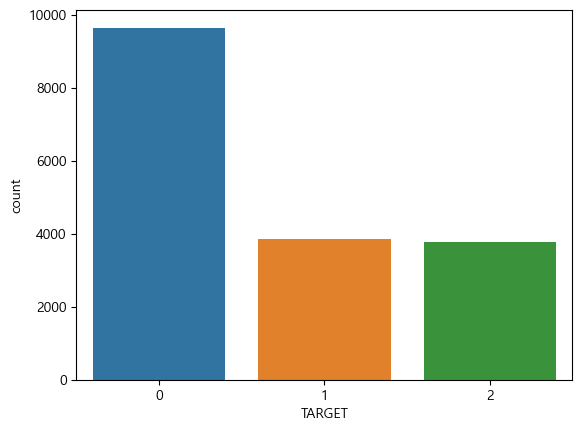

In [315]:
sns.countplot(x='TARGET',data = sub)
print(sub.groupby('TARGET').size())

In [165]:
from lightgbm import LGBMClassifier